# Scatterplots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   
5  32209       Lexus          GS 350  2013     Midsize Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
3    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
4  Front-Wheel Drive     Automatic (S6)  Regular Gasoline          4    2.4   
5   Rear-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.5   

   pv2  pv4     city    UCity  highway  UHighway     comb  co2  feScore  \
0   79    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4   
1   94    0  21.8706  26.9770  31.0367   42.4936  25.2227  349        6   
2   94    0  17.4935  21.2000  26.5716   35.1000  20.6716  429        5   
3   94    0  16.9415  20.5000  25.2190   33.5000  19.8774  446        5   
4    0   95  24.7726  31.9796  35.5340   51.8816  28.6813  310        8   
5    0   99  19.4325  24.1499  28.2234   38.5000  22.6002  393        6   

   ghgScore  
0         4  
1         6  
2         5  
3         5  
4         8  
5         6

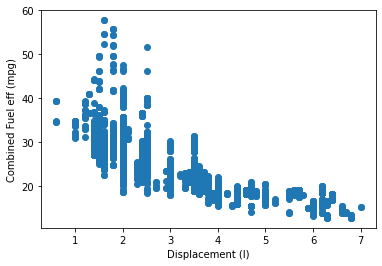

In [3]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel eff (mpg)');

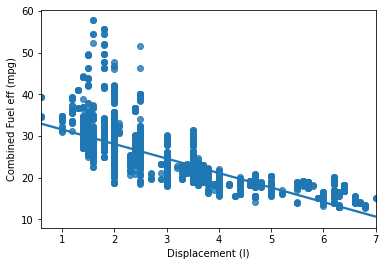

In [4]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel eff (mpg)');

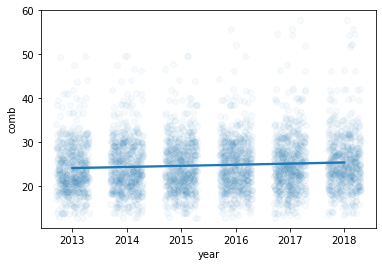

In [5]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
          scatter_kws = {'alpha' : 1/30} );
#use x_jitter for jitter effect and "scatter_kws" for alpha

## Heatmaps

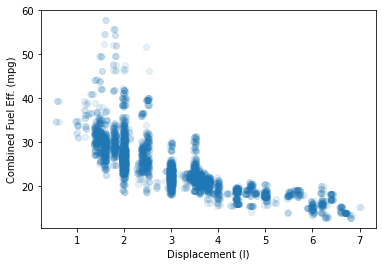

In [6]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter = 0.04,
          scatter_kws = {'alpha' : 1/10}, fit_reg = False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

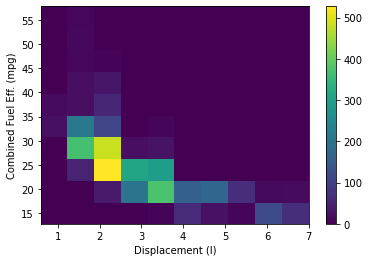

In [7]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [8]:
fuel_econ[['displ', 'comb']].describe()

displ         comb
count  3929.000000  3929.000000
mean      2.950573    24.791339
std       1.305901     6.003246
min       0.600000    12.821700
25%       2.000000    20.658100
50%       2.500000    24.000000
75%       3.600000    28.227100
max       7.000000    57.782400

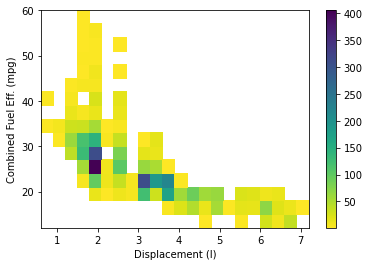

In [9]:
#Use bins edge of 0.3 for displacement and 3 for comb
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = "viridis_r", bins = [bins_x, bins_y]);
#viridis_r a reversed viridis color palette -> cmin = 0.5. means only display color if at least one point
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

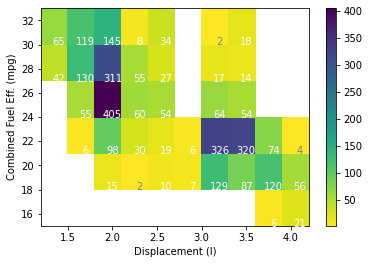

In [10]:
#Use bins edge of 0.3 for displacement and 3 for comb
bins_x = np.arange(1.2, 4+0.3, 0.3)
bins_y = np.arange(15, 32+3, 3)
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = "viridis_r", bins = [bins_x, bins_y]);
#viridis_r a reversed viridis color palette -> cmin = 0.5. means only display color if at least one point

counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 5: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.2, bins_y[j]+0.2, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 1:
            plt.text(bins_x[i]+0.2, bins_y[j]+0.2, int(c),
                     ha = 'center', va = 'center', color = 'grey')

plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Violin Plots

In [11]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

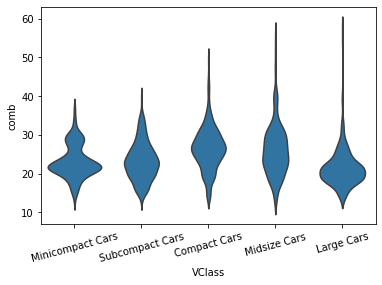

In [12]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
             color = base_color, inner = None);
#use inner = 'quartile' to show inner quartile delimiters
plt.xticks(rotation = 15);

# Box Plots
https://www.youtube.com/watch?v=f6v3L3IDo24

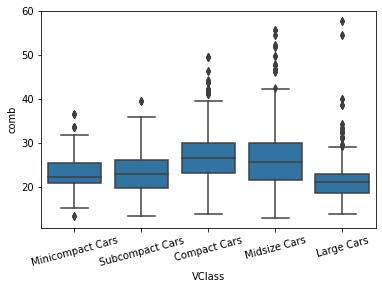

In [13]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
             color = base_color)
plt.xticks(rotation = 15);

# Clusterd Bar Charts
https://www.youtube.com/watch?v=OnzWhpgM9Vs

In [14]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [15]:
#get number of cars in each variable level as panda series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
#reset.index to convert panda series into DataFrame
ct_counts = ct_counts.reset_index(name = 'count')
#use pivot to rearrange data so that it fits
ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')

trans_type        Automatic  Manual
VClass                             
Minicompact Cars        188     133
Subcompact Cars         502     171
Compact Cars            784     338
Midsize Cars            989     199
Large Cars              605      20

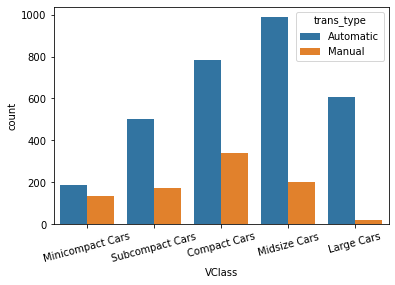

In [16]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation = 15);

# Faceting
https://youtu.be/3Ls6w8Cd8n4

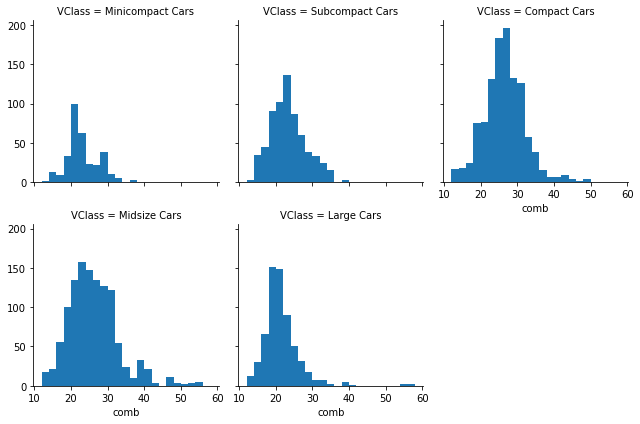

In [17]:
#Creates a plot for heach VClass
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3);
# create bins parameter so all bins are same size
bins = np.arange(12, 58+2, 2)
#create the plot for the comb variables
g.map(plt.hist, 'comb', bins = bins);

In [ ]:
#Creates a plot for heach VClass
g = sb.FacetGrid(data = fuel_econ, col = 'make', col_wrap = 3);
# create bins parameter so all bins are same size
bins = np.arange(12, 58+2, 2)
#create the plot for the comb variables
g.map(plt.hist, 'comb', bins = bins);


## Line Plots
https://youtu.be/kSntEWPuOa0 

https://youtu.be/Z7NjwA6jbjU


In [29]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
3    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
4  Front-Wheel Drive     Automatic (S6)  Regular Gasoline          4    2.4   

   pv2  pv4     city    UCity  highway  UHighway     comb  co2  feScore  \
0   79    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4   
1   94    0  21.8706  26.9770  31.0367   42.4936  25.2227  349        6   
2   94    0  17.4935  21.2000  26.5716   35.1000  20.6716  429        5   
3   94    0  16.9415  20.5000  25.2190   33.5000  19.8774  446        5   
4    0   95  24.7726  31.9796  35.5340   51.8816  28.6813  310        8   

   ghgScore  
0         4  
1         6  
2         5  
3         5  
4         8

Text(0, 0.5, 'Avg Combinded Fuel (mpg)')

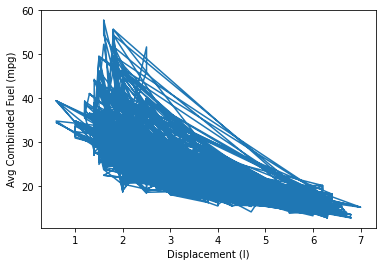

In [30]:
plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Avg Combinded Fuel (mpg)')

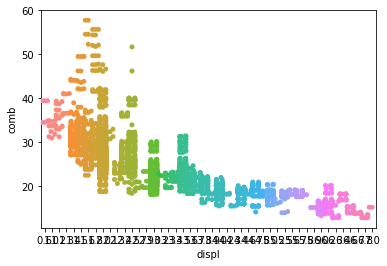

In [34]:
sb.swarmplot(data = fuel_econ, x = 'displ', y = 'comb');